### RFM stands for Receny, Frequency, monetary. RFM model is used for customer segmentation.

###### The objective : The analysis will help in determining which customers segments should be targeted in order to enhance sales revenue for the company.

# 1. RFM Analysis
###### RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

### Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
### Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
### Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

%matplotlib inline

In [2]:
# Loading the Transactions and Customer Demographics Datasets

trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.shape

(19803, 14)

In [4]:
cust.shape

(3912, 14)

In [5]:
#will merget two dataframe to creat trans_cust_merge

merged_trans_cust = pd.merge(trans, cust,left_on = 'customer_id', right_on = "customer_id", how ="inner")

In [6]:
# Fetching the first 5 records of the merged dataset.

merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_Group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69,70
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69,70
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69,70
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45,50
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45,50


In [7]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_trans_cust.shape[1]))

Total records (rows) in the Merged Dataset : 19354
Total features (columns) in the Merged Dataset : 27


In [8]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type.

In [9]:
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

In [10]:
# Maximum Transaction Date or the latest transaction date.
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [11]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date
#convert the datetime to timestamp uisng strptime

datetime.datetime(2017, 12, 30, 0, 0)

In [12]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [13]:
rfm_table

,transaction_date,product_id,Profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [14]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed
rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [15]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [16]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [17]:
# RFM_table dataset

rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [18]:
merged_trans_cust.drop(columns=['Age_Group'], inplace = True)

In [19]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [20]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4 ,  ['Bronze','Silver','Gold','Platinum'])

In [21]:
# RFM table dataset
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [22]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on = 'customer_id', right_on = 'customer_id', \
                          how = "inner")

In [23]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [24]:
#creating the age group for the newly created table
import math
cust_trans_rfm['Age_group'] = cust_trans_rfm['Age'].apply(lambda x: (math.floor(x/10)+1)*10)

In [25]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [26]:
# Applying the above functions and creating a new feature detail_cust_title
cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [27]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11
        

In [28]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm['detail_cust_title'].apply(get_rank)

In [29]:
cust_trans_rfm.columns
cust_trans_rfm.to_csv('cust_trans.csv')

### New vs Old Customers Age Distribution

In [30]:
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,45,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58,60


Text(0, 0.5, 'No.of.New_customers')

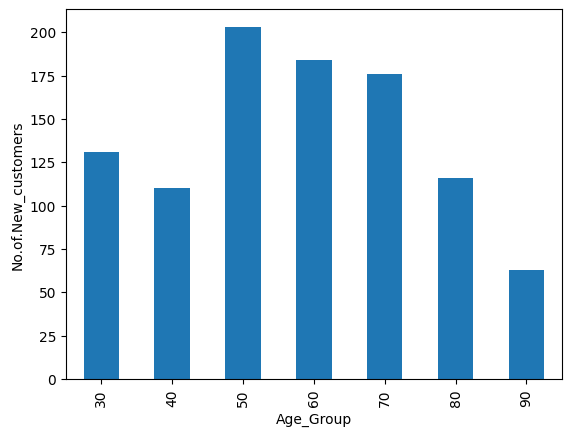

In [31]:
new_cust.groupby('Age_Group')['first_name'].agg('count') \
.plot(kind= 'bar')

plt.ylabel('No.of.New_customers')

Text(0, 0.5, 'No.of.Old_customers')

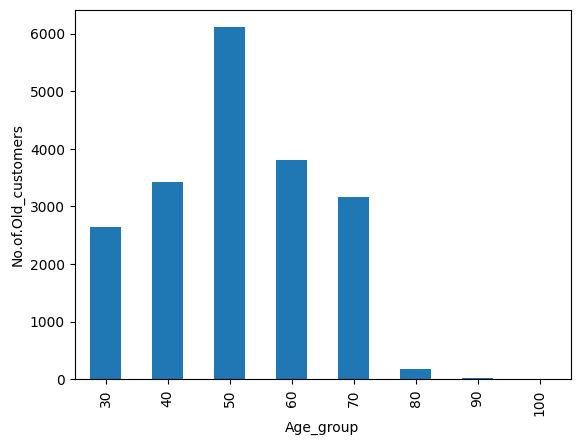

In [32]:
cust_trans_rfm.groupby('Age_group')['customer_id'].agg('count') \
.plot(kind= 'bar')
plt.ylabel('No.of.Old_customers')

#### Observations:
###### 1.Most New customers are aged between 40-49 also for Old Customers the most of them are aged between 40-49
###### 2.The lowest number of customers for both the types of customers is present in the above 80 age groups.
###### 3.The automobile company is popular among New Customers among the age groups 40-69.
###### 4.A steep drop in customers is observed in the 30-39 age group among the New Customers

### Bike purchases over last 3 years by Gender

Text(0, 0.5, 'Percent of total purchases')

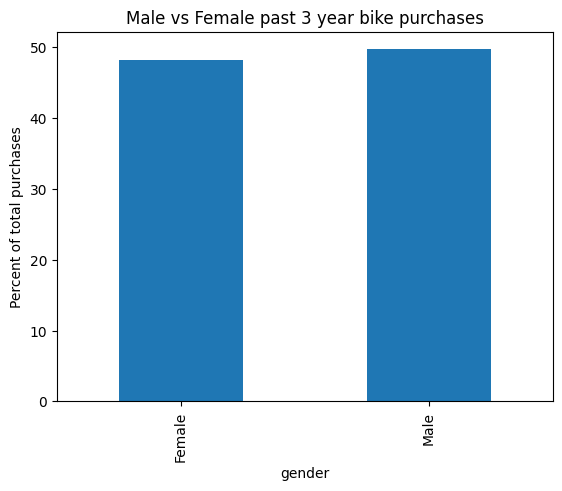

In [33]:
#plot the values in percentage. which sum of value / count
cust_trans_rfm.groupby('gender')['past_3_years_bike_related_purchases'] \
    .agg(lambda x: sum(x) / len(x))\
.plot(kind= 'bar')

plt.title('Male vs Female past 3 year bike purchases')
plt.ylabel('Percent of total purchases')

### Observations:

###### Most bike puechases are done by Feamale over the last 3 years. Approximately 51% of the bike purchases are done by Female compared to 49% of the purchases being done by Male.
###### The Female purchases are 10,000 more than that of Male purchases (numerically).

## New Customers - Job Industry wise

Text(0.5, 1.0, 'New Customers - Job Industry Customer Distribution')

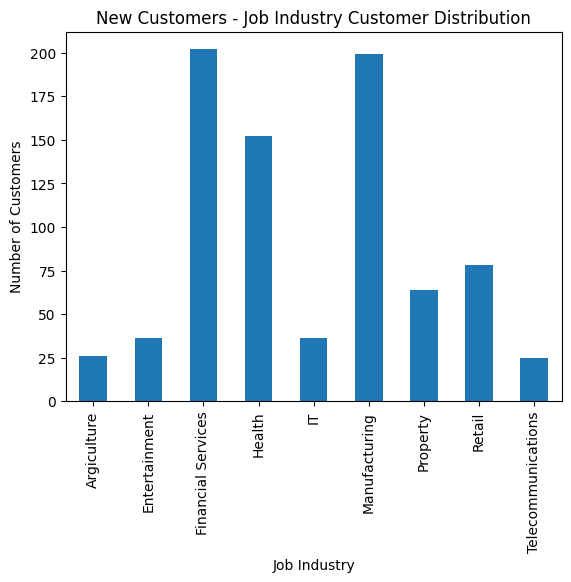

In [34]:
new_cust[~(new_cust['job_industry_category']=='Missing')].groupby('job_industry_category')['first_name'].agg('count') \
.plot(kind='bar')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')


Text(0.5, 1.0, 'Old Customers - Job Industry Customer Distribution')

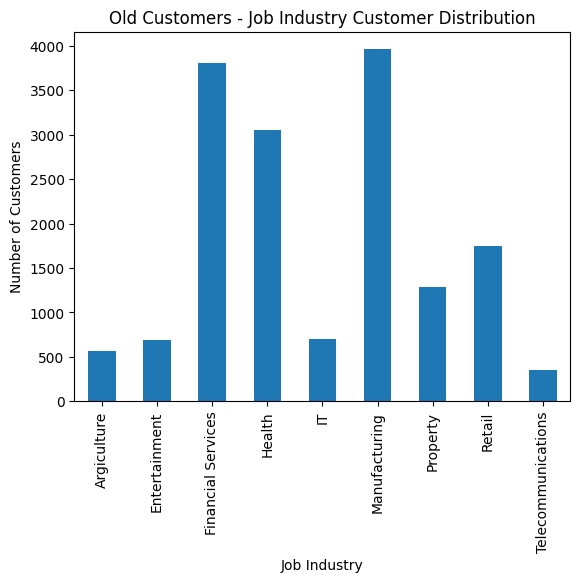

In [35]:
cust_trans_rfm[~(cust_trans_rfm['job_industry_category'] == "Missing")].groupby('job_industry_category')['customer_id'].agg('count')\
.plot(kind= "bar")
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

In [36]:
wealth_agg_seg_cust = new_cust.groupby(['wealth_segment', 'Age_Group']).size().reset_index()
wealth_agg_seg_cust

,wealth_segment,Age_Group,0
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,28
8,High Net Worth,40,36
9,High Net Worth,50,51


In [37]:
wealth_agg_seg_cust.rename(columns={0: 'Number of Customers'}, inplace = True)
wealth_agg_seg_cust

,wealth_segment,Age_Group,Number of Customers
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,28
8,High Net Worth,40,36
9,High Net Worth,50,51


Text(0.5, 1.0, 'New Customers - Wealth Segmentation by Age Group')

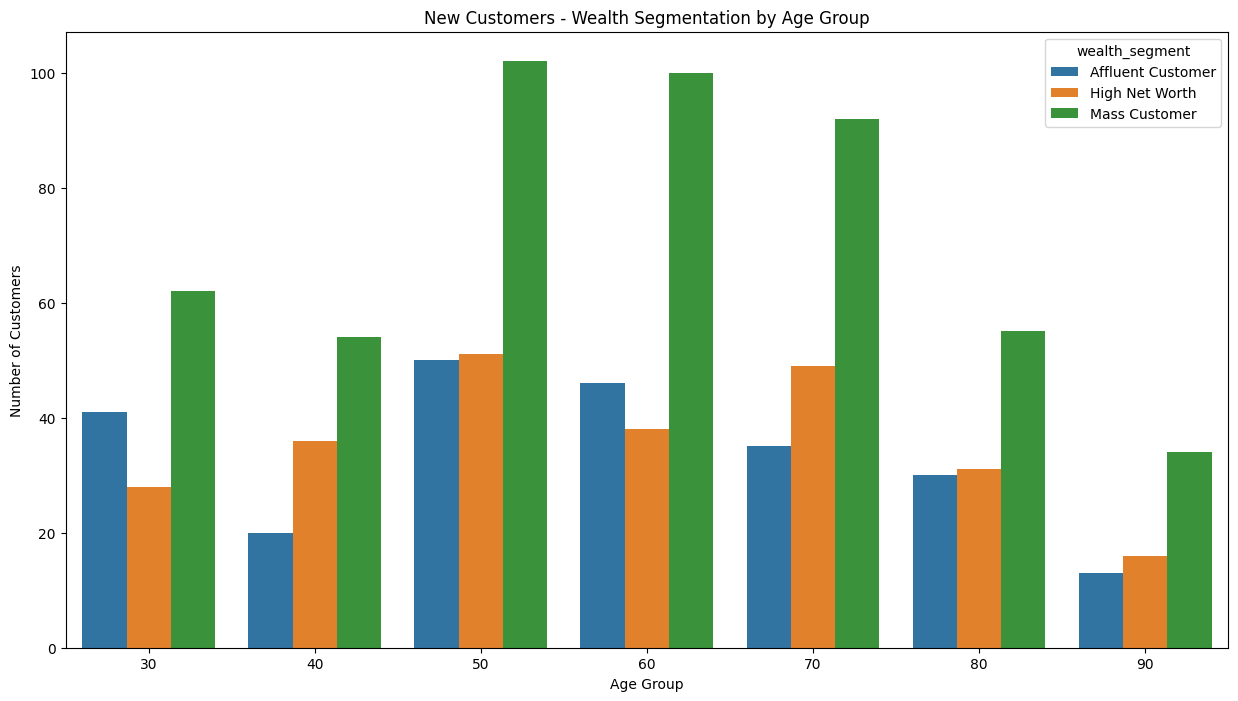

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x= 'Age_Group', y = 'Number of Customers', hue = 'wealth_segment', data = wealth_agg_seg_cust)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')

## Old Customers

In [39]:
wealth_agg_old_cust = cust_trans_rfm.groupby(['wealth_segment', 'Age_group']).size().reset_index()
wealth_agg_old_cust

,wealth_segment,Age_group,0
0,Affluent Customer,30,762
1,Affluent Customer,40,814
2,Affluent Customer,50,1407
3,Affluent Customer,60,935
4,Affluent Customer,70,750
5,Affluent Customer,80,37
6,Affluent Customer,90,5
7,Affluent Customer,100,10
8,High Net Worth,30,577
9,High Net Worth,40,919


In [40]:
wealth_agg_old_cust.rename(columns={0:'Number of Customers'}, inplace = True)

<AxesSubplot: xlabel='Age_group', ylabel='Number of Customers'>

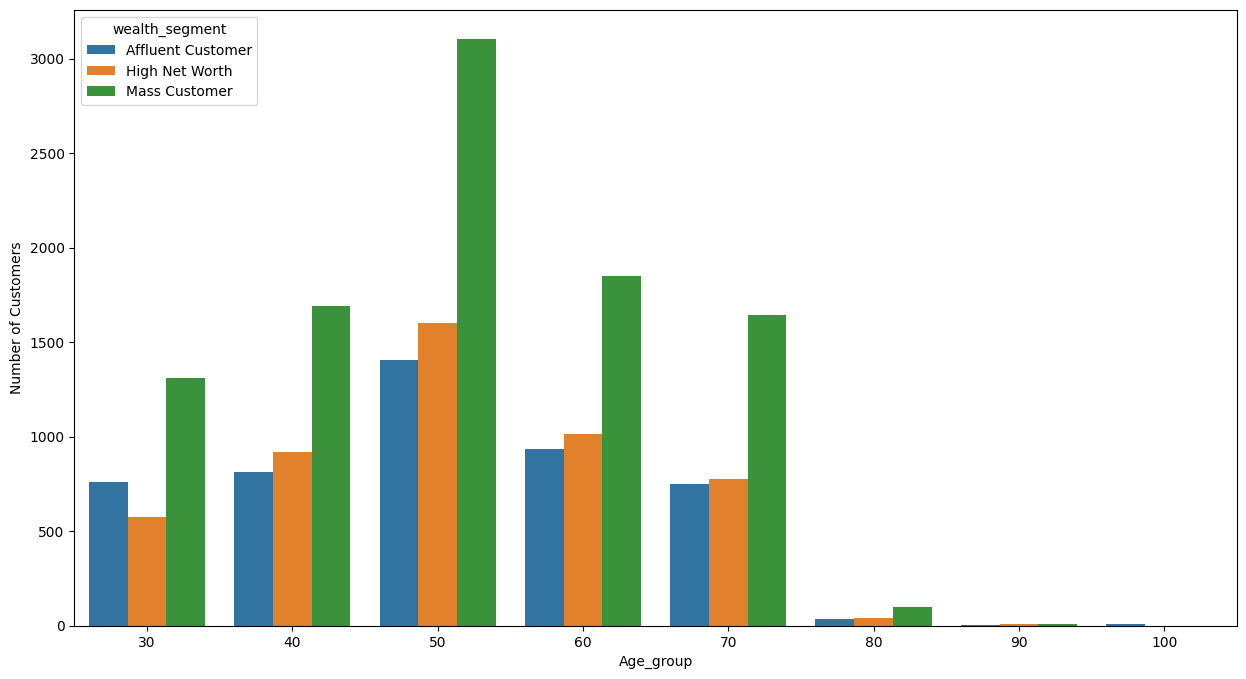

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Age_group', y = 'Number of Customers', hue = 'wealth_segment', data=wealth_agg_old_cust)

# Car owner across each State

In [42]:
# Loading the Customer Address Dataset.
cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [43]:
# Merging the RFM data with Customer Address dataset.\
cust_trans_addr = pd.merge(cust_trans_rfm, cust_addr_info, left_on = 'customer_id',right_on = 'customer_id', how='inner')

In [44]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [45]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [46]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


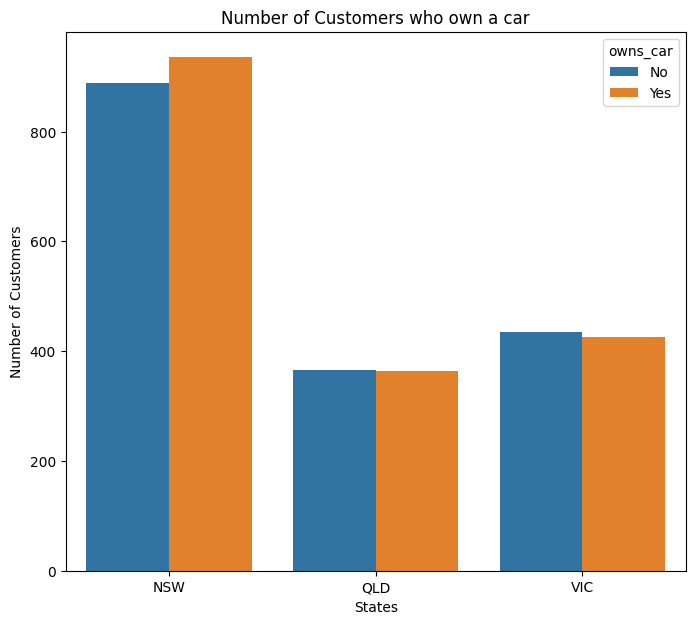

In [47]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

C:\Users\Vicky Ram\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


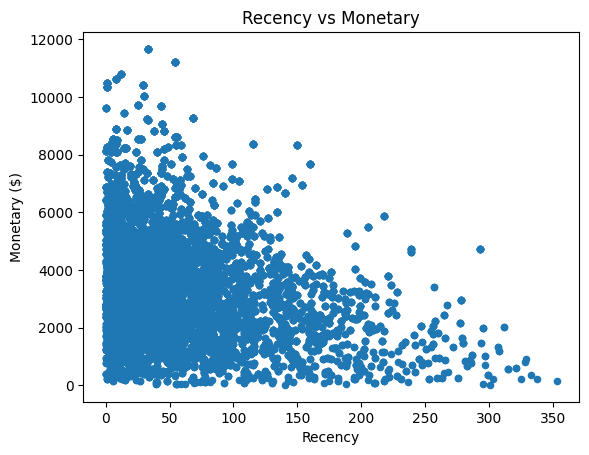

In [48]:
cust_trans_rfm.plot.scatter(x='recency', y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

Text(0.5, 1.0, 'Frequency vs Monetary')

<Figure size 800x700 with 0 Axes>

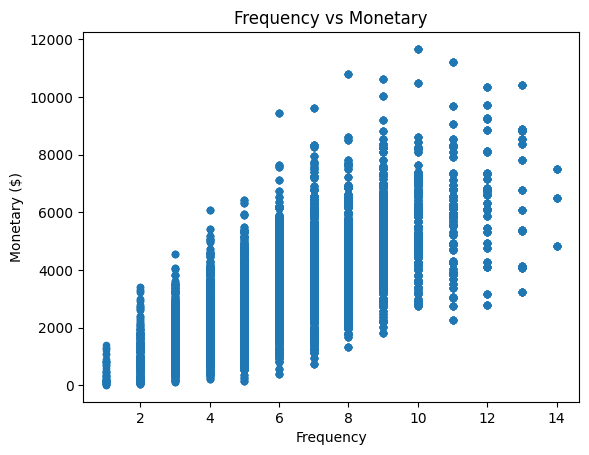

In [49]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')

In [50]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(['detail_cust_title','rank'])\
.size().reset_index().sort_values('rank')

In [51]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


Text(0.5, 1.0, 'Number of Customers by Customer Segment')

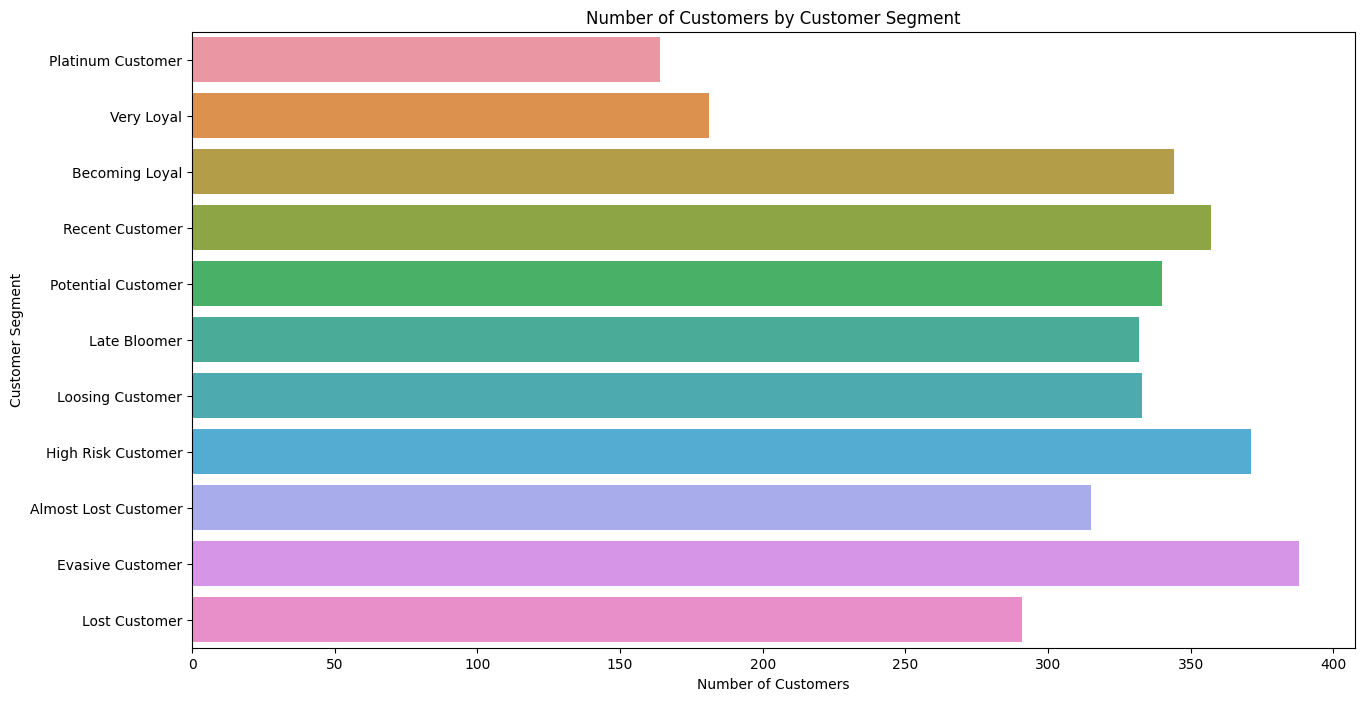

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')

In [56]:
#print(f'The result is {table1_col} and {table2_col}')

The result is Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'recency', 'frequency', 'monetary',
       'r_quartile', 'f_quartile', 'm_quartile', 'rfm_score', 'customer_title',
       'Age_group', 'detail_cust_title', 'rank'],
      dtype='object') and Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'Age', 'Age_Group'],
      dty